In [1]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import pickle
from numpy import genfromtxt
import pandas as pd
from joblib import Parallel, delayed
import multiprocessing as mp
import scipy.io
from tqdm import tqdm_notebook as tqdm
import h5py
import math

In [2]:
import sys
from mgcpy.independence_tests.dcorr import DCorr
from mgcpy.benchmarks.hypothesis_tests.two_sample_test.power_angle import power_given_data
from mgcpy.benchmarks.simulations import *
from mgcpy.independence_tests.mgc import MGC
from mgcpy.independence_tests.rv_corr import RVCorr
from mgcpy.independence_tests.hhg import HHG
from mgcpy.independence_tests.kendall_spearman import KendallSpearman

In [3]:
simulations = {'sine_16pi': (sin_sim, 13), 'square': (square_sim, 14), 'two_parabolas': (two_parab_sim, 15)}

In [4]:
def power_vs_angle_parallel(params_dict):
    angles = [i for i in range(0, 99, 9)]
    estimated_power = np.zeros(len(angles))
    test = params_dict['independence_test']
    sim = params_dict['simulation_type']
    additional_params = params_dict['additional_params']
    print(sim, test.get_name())
    
    for i in range(len(angles)):
        estimated_power[i] = power_given_data(test, sim, num_samples=100, num_dimensions=1, theta=angles[i], repeats=1000, alpha=.05, additional_params = additional_params)
    
    np.savetxt('{}_fastmgc_angle_matlab_new.csv'.format(sim), estimated_power, delimiter=',')
    print('{} {} finished'.format(sim, test.get_name()))
    return (params_dict, estimated_power)

In [5]:
def make_sim_list(params_dict):
    sim = params_dict['simulation_type']
    return sim

In [6]:
def fill_params_dict_list_angles():
    mcorr = DCorr(which_test='unbiased')
    dcorr = DCorr(which_test='biased')
    mantel = DCorr(which_test='mantel')
    mgc = MGC()
    pearson = RVCorr(which_test='pearson')
    rv_corr = RVCorr(which_test='rv')
    cca = RVCorr(which_test='cca')
    independence_tests = [rv_corr]
    
    params_dict_list = []
    for sim_name, sim_func in simulations.items():
        fast_mgc = MGC()
        additional_params = {"is_fast": True}
        params_dict = {'independence_test': fast_mgc, 'simulation_type': sim_func[1], 'additional_params': additional_params}
        params_dict_list.append(params_dict)
    #for sim_name, sim_func in simulations.items():
        #for test in independence_tests:
            #params_dict = {'independence_test': test, 'simulation_type': sim_func[1]}
            #params_dict_list.append(params_dict)
    return params_dict_list

In [7]:
%%time
params_dict = fill_params_dict_list_angles()
print(type(params_dict))
pool = mp.Pool(mp.cpu_count()-1)
results = pool.map(power_vs_angle_parallel, params_dict)

<class 'list'>
13 mgc
14 mgc
15 mgc


/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

15 mgc finished


/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

13 mgc finished


/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that the results are not statistically significant.
Use results such as test_statistic and optimal_scale, with caution!
  warnings.warn("The p-value is greater than 0.05, implying that the results are not statistically significant.\n" +
/anaconda3/lib/python3.7/site-packages/mgcpy-0.3.0-py3.7-macosx-10.7-x86_64.egg/mgcpy/independence_tests/mgc.py:269: UserWarning: The p-value is greater than 0.05, implying that th

14 mgc finished
CPU times: user 15.1 s, sys: 7.33 s, total: 22.4 s
Wall time: 2h 23min 49s


In [8]:
def plot_all_curves():
    simulation_names = ['linear', 'exponential', 'cubic','joint_normal', 'step', 'quadratic', 'w_shape', 'spiral', 
                         'bernoulli', 'log', 'fourth_root', 'sine_4pi',
                       'sine_16pi', 'square', 'two_parabolas', 'circle', 'ellipse', 'diamond', 'multi_noise',
                        'multi_indept']
        
        
    fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(14,12))  
    simulation_type = 0
    for i, row in enumerate(ax):
        for j, col in enumerate(row):
            sim_name = simulation_names[simulation_type]
            simulation_type += 1
            tests = ['mgc', 'unbiased', 'biased', 'mantel', 'pearson', 'rv', 'cca','fastmgc']
            #mgc_power = np.genfromtxt('{}_mgc_angle_matlab_new.csv'.format(simulation_type), delimiter=',')

            for test in tests:
                power = np.genfromtxt('{}_{}_angle_matlab_new.csv'.format(simulation_type, test), delimiter=',')
                x_axis = [i for i in range(0,99,9)]
                col.plot(x_axis, power, label=test)
                col.set_ylim(-0.25, 1.25)
                col.set_yticks([-0.25, 0, 0.25, 0.50, 0.75, 1.00])
                col.set_title(sim_name) 
    plt.legend()
    plt.subplots_adjust(hspace=.75)
    fig.suptitle('Power of Changing Angle')
    #plt.savefig('power_curves_angles_new')

OSError: 16_fastmgc_angle_matlab_new.csv not found.

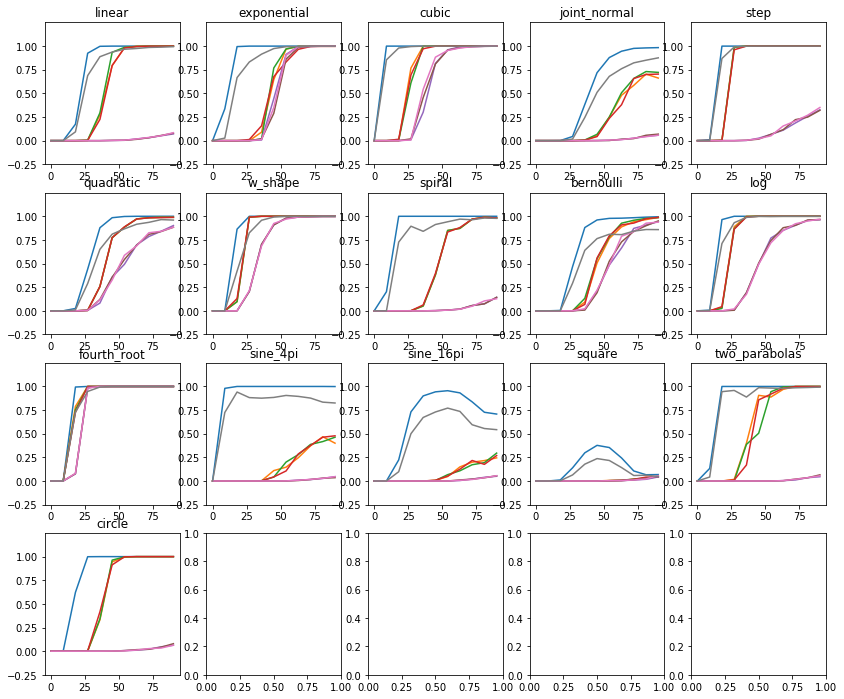

In [9]:
plot_all_curves()

In [ ]:
def plot_diff():
    simulation_names = ['linear', 'exponential', 'cubic','joint_normal', 'step', 'quadratic', 'w_shape', 'spiral', 
                         'bernoulli', 'log', 'fourth_root', 'sine_4pi',
                       'sine_16pi', 'square', 'two_parabolas', 'circle', 'ellipse', 'diamond']
        
        
    fig, ax = plt.subplots(nrows=3, ncols=6, figsize=(14,12))  
    simulation_type = 0
    for i, row in enumerate(ax):
        for j, col in enumerate(row):
            sim_name = simulation_names[simulation_type]
            simulation_type += 1
            tests = ['mgc', 'unbiased', 'biased', 'mantel', 'pearson', 'rv', 'cca']

            for test in tests:
                power = np.genfromtxt('{}_{}_angle_matlab.csv'.format(simulation_type, test), delimiter=',')
                new_power = np.genfromtxt('{}_{}_angle_matlab_new.csv'.format(simulation_type, test), delimiter=',')
                diff = new_power - power
                x_axis = [i for i in range(0,200,20)]
                col.plot(x_axis, diff, label=test)
                col.set_ylim(-0.25, 1.25)
                col.set_yticks([-0.25, 0, 0.25, 0.50, 0.75, 1.00])
                col.set_title(sim_name) 
    plt.legend()
    plt.subplots_adjust(hspace=.75)
    fig.suptitle('Power of Changing Angle for New Transform Function vs Old Transform Function')
    plt.savefig('power_curves_angles_diff')

In [ ]:
#plot_diff()